Controllo dati sulle tabelle "orders" e "order_items"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [19]:
#import orderitems.csv
df_orders= pd.read_csv("orders.csv")
df_orders.head(5)

,order_id,user_id,status,gender,num_of_item,order_date,order_time,return_date,return_time,shipping_date,shipping_time,delivery_date,delivery_time
0,2,2,Cancelled,F,1,2023-07-11,14:38:49,NaN,NaN,NaN,NaN,NaN,NaN
1,3,3,Cancelled,F,1,2024-05-05,13:01:45,NaN,NaN,NaN,NaN,NaN,NaN
2,11,9,Cancelled,F,1,2021-04-17,12:08:37,NaN,NaN,NaN,NaN,NaN,NaN
3,45,40,Cancelled,F,1,2025-01-20,04:56:08,NaN,NaN,NaN,NaN,NaN,NaN
4,57,48,Cancelled,F,1,2025-03-20,02:40:59,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_orders.info()

<class 'pandas.DataFrame'>
RangeIndex: 124937 entries, 0 to 124936
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   order_id       124937 non-null  int64
 1   user_id        124937 non-null  int64
 2   status         124937 non-null  str  
 3   gender         124937 non-null  str  
 4   num_of_item    124937 non-null  int64
 5   order_date     124937 non-null  str  
 6   order_time     124937 non-null  str  
 7   return_date    12452 non-null   str  
 8   return_time    12452 non-null   str  
 9   shipping_date  81020 non-null   str  
 10  shipping_time  81020 non-null   str  
 11  delivery_date  43654 non-null   str  
 12  delivery_time  43654 non-null   str  
dtypes: int64(3), str(10)
memory usage: 12.4 MB


In [ ]:
#convert time fields from object to datetime
#date_object = [
    #"order_time",
    #"return_time",
    #"shipping_time",
    #"delivery_time"]
#for col in date_object:
#    df_orders[col] = pd.to_datetime(df_orders[col], format='%H:%M:%S', errors='coerce')

#"only time" format non available in pandas 

In [21]:
#convert date fields from object to datetime
date_object = [
    "order_date",
    "return_date",
    "shipping_date",
    "delivery_date"
]

df_orders[date_object] = df_orders[date_object].apply(pd.to_datetime)

In [22]:
#check null values in date and time columns
print(df_orders["return_date"].isna().sum())
print(df_orders["return_time"].isna().sum())
print(df_orders["shipping_date"].isna().sum())
print(df_orders["shipping_time"].isna().sum())
print(df_orders["delivery_date"].isna().sum())
print(df_orders["delivery_time"].isna().sum())

112485
112485
43917
43917
81283
81283


Null values in date and time columns are consistent

In [23]:
#descriptive statistics of number of items per order
df_orders.num_of_item.describe()

count    124937.000000
mean          1.446889
std           0.801593
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: num_of_item, dtype: float64

In [28]:
#add prep_days and delivery_days columns
df_orders["prep_days"]=df_orders["shipping_date"]-df_orders["order_date"]
df_orders["delivery_days"]=df_orders["delivery_date"]-df_orders["shipping_date"]
#days conversion
df_orders['delivery_days'] = df_orders['delivery_days'].dt.days
df_orders['prep_days'] = df_orders['prep_days'].dt.days
df_orders.sample(5)

,order_id,user_id,status,gender,num_of_item,order_date,order_time,return_date,return_time,shipping_date,shipping_time,delivery_date,delivery_time,prep_days,delivery_days
40620,56791,45240,Returned,F,1,2022-04-24,05:28:46,2022-04-28,23:29:46,2022-04-24,18:49:46,2022-04-28,19:51:46,0.0,4.0
32707,76166,60894,Processing,F,1,2019-08-29,20:00:37,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN
20365,87039,69611,Complete,F,1,2025-12-15,06:23:55,NaT,NaN,2025-12-17,06:59:55,2025-12-20,18:11:55,2.0,3.0
115073,60242,48036,Shipped,M,1,2021-11-16,10:36:41,NaT,NaN,2021-11-16,22:30:41,NaT,NaN,0.0,NaN
72364,2058,1709,Complete,M,1,2025-08-20,12:31:41,NaT,NaN,2025-08-23,06:03:41,2025-08-25,02:24:41,3.0,2.0


In [29]:
#descriptive statistics for delivery days
df_orders["delivery_days"].describe()

count    43654.000000
mean         2.496449
std          1.498745
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          5.000000
Name: delivery_days, dtype: float64

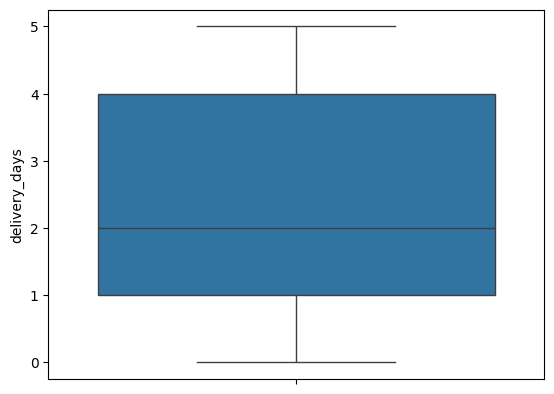

In [30]:
ax=sns.boxplot(data = df_orders.delivery_days)
ax.set_xlabel("")
plt.show()

In [32]:
#descriptive statistics for preparation days
df_orders["prep_days"].describe()

count    81020.000000
mean         1.503073
std          0.960161
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: prep_days, dtype: float64

<Axes: ylabel='prep_days'>

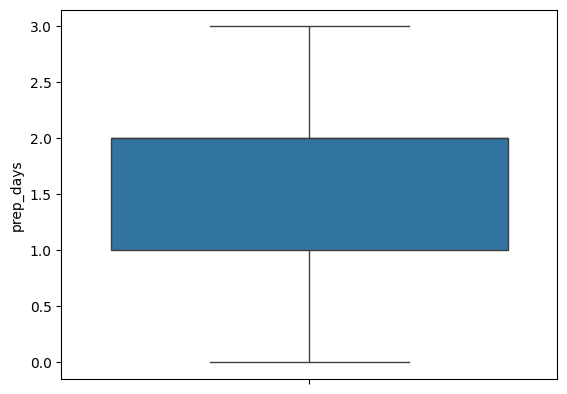

In [33]:
sns.boxplot(data = df_orders.prep_days)

In [34]:
#import order_items.csv
df_orderitems=pd.read_csv("order_items.csv")
df_orderitems.head(5)

,id,order_id,user_id,product_id,inventory_item_id,status,sale_price,gender,num_of_item_per_order,country,order_date,order_time,return_date,return_time,shipping_date,shipping_time,delivery_date,delivery_time
0,86513,59766,47662,14235,233397,Cancelled,0.02,F,1,China,2023-11-07,23:32:14,NaN,NaN,NaN,NaN,NaN,NaN
1,7744,5348,4332,14235,20935,Processing,0.02,F,2,United States,2023-07-05,20:59:00,NaN,NaN,NaN,NaN,NaN,NaN
2,56770,39182,31139,14235,153483,Processing,0.02,F,1,China,2022-02-26,19:26:13,NaN,NaN,NaN,NaN,NaN,NaN
3,50763,35059,27875,14235,137281,Shipped,0.02,F,4,China,2023-02-05,10:51:03,NaN,NaN,2023-02-05,18:22:21,NaN,NaN
4,90008,62235,49632,14235,242880,Shipped,0.02,F,4,United States,2024-11-24,12:21:31,NaN,NaN,2024-11-22,03:01:31,NaN,NaN


In [35]:
df_orderitems.info()

<class 'pandas.DataFrame'>
RangeIndex: 180770 entries, 0 to 180769
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     180770 non-null  int64  
 1   order_id               180770 non-null  int64  
 2   user_id                180770 non-null  int64  
 3   product_id             180770 non-null  int64  
 4   inventory_item_id      180770 non-null  int64  
 5   status                 180770 non-null  str    
 6   sale_price             180770 non-null  float64
 7   gender                 180770 non-null  str    
 8   num_of_item_per_order  180770 non-null  int64  
 9   country                180770 non-null  str    
 10  order_date             180770 non-null  str    
 11  order_time             180770 non-null  str    
 12  return_date            18136 non-null   str    
 13  return_time            18136 non-null   str    
 14  shipping_date          117506 non-null  str    

In [36]:
#check null values
print(df_orderitems["return_date"].isna().sum())
print(df_orderitems["return_time"].isna().sum())
print(df_orderitems["shipping_date"].isna().sum())
print(df_orderitems["shipping_time"].isna().sum())
print(df_orderitems["delivery_date"].isna().sum())
print(df_orderitems["delivery_time"].isna().sum())

162634
162634
63264
63264
117371
117371


Null values in date and time columns are consistent

In [172]:
#convert time fields from object to datetime
#date_object = [
    #"order_time",
    #"return_time",
    #"shipping_time",
    #"delivery_time"]
#for col in date_object:
#    df_orderitems[col] = pd.to_datetime(df_orderitems[col], errors='coerce').dt.time

#only time format non available in pandas

In [37]:
#convert date fields from object to datetime
date_object = [
    "order_date",
    "return_date",
    "shipping_date",
    "delivery_date",
]

df_orderitems[date_object] = df_orderitems[date_object].apply(pd.to_datetime)

In [38]:
#descriptive statistics of sale price
df_orderitems.sale_price.describe()

count    180770.000000
mean         59.609239
std          65.973924
min           0.020000
25%          24.950000
50%          39.990000
75%          69.950000
max         999.000000
Name: sale_price, dtype: float64

<Axes: ylabel='sale_price'>

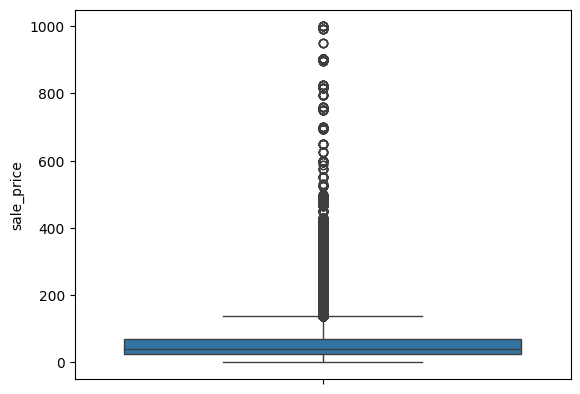

In [39]:
sns.boxplot(data = df_orderitems.sale_price)

In [41]:
df_orders.to_csv("df_orders", index=False)

In [42]:
df_orderitems.to_csv("df_orderitems", index=False)